
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Felicidades Ari! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

# Paso 4.
### Hola, en este apartado aplicaré los pasos que se piden en el paso 4 con la finalidad de estudar mas a fondo el df 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Es una buena práctica separar la importación de bibliotecas de la carga de los datasets para que el código sea más legible y organizado. Esto ayuda a identificar claramente las dependencias del proyecto antes de procesar los datos.

</div>

In [35]:
# Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

#Importación de DataSets 
company = pd.read_csv('moved_project_sql_result_01.csv')
location = pd.read_csv('moved_project_sql_result_04.csv')
weather = pd.read_csv('moved_project_sql_result_07.csv')

# Verificación de datos para estudiarlos
print(company)
print()
print(location)

# Verificacion de tipo de datos
company.info()
print()
location.info()

# Identificación de barrios en terminos de finalización de recorrido
print(location.head(10))

                                 company_name  trips_amount
0                                   Flash Cab         19558
1                   Taxi Affiliation Services         11422
2                            Medallion Leasin         10367
3                                  Yellow Cab          9888
4             Taxi Affiliation Service Yellow          9299
..                                        ...           ...
59               4053 - 40193 Adwar H. Nikola             7
60                    2733 - 74600 Benny Jona             7
61              5874 - 73628 Sergey Cab Corp.             5
62  2241 - 44667 - Felman Corp, Manuel Alonso             3
63                3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..              

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo estudiando los datasets! Esto es fundamental para entender los datos y planificar el análisis.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda dejar comentarios sobre tus análisis de los mismos. 

</div>

</div>

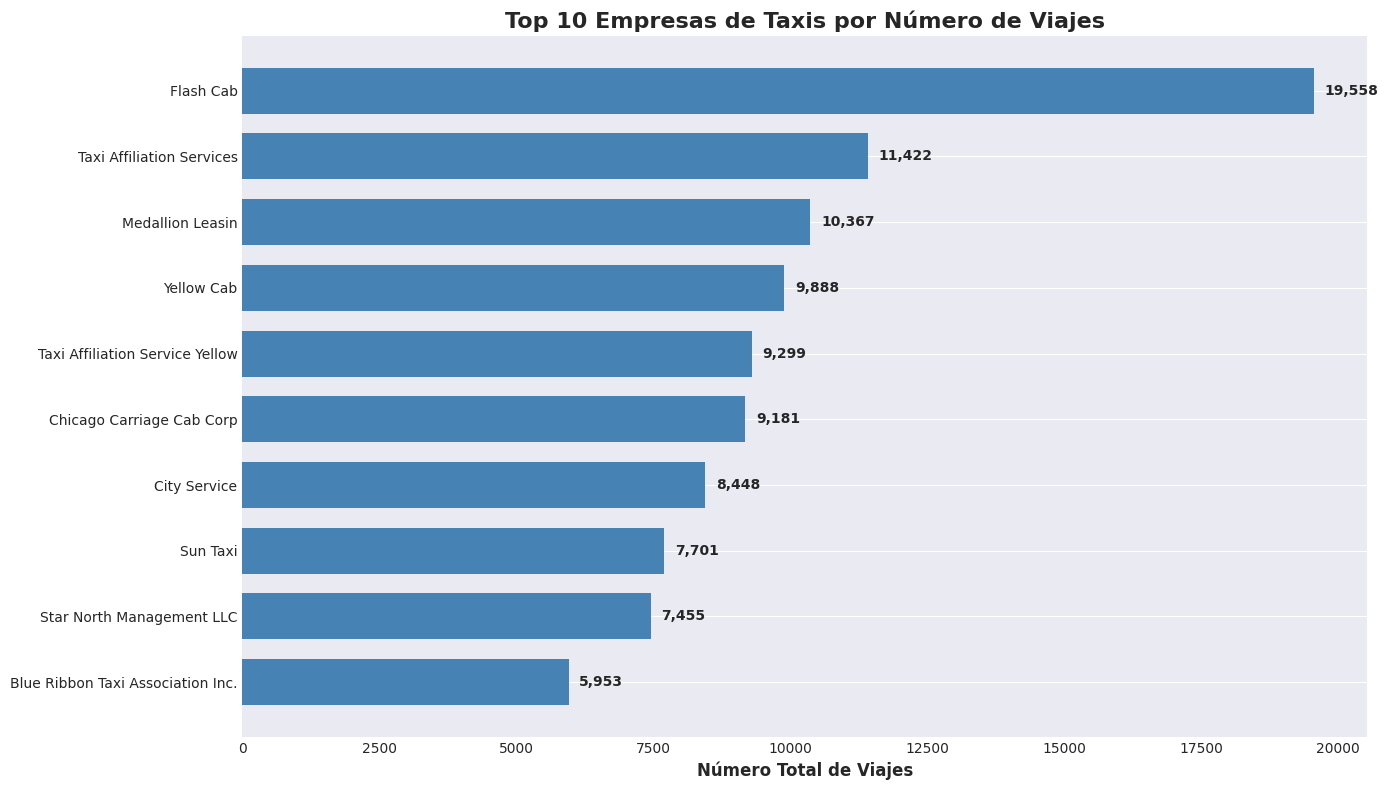

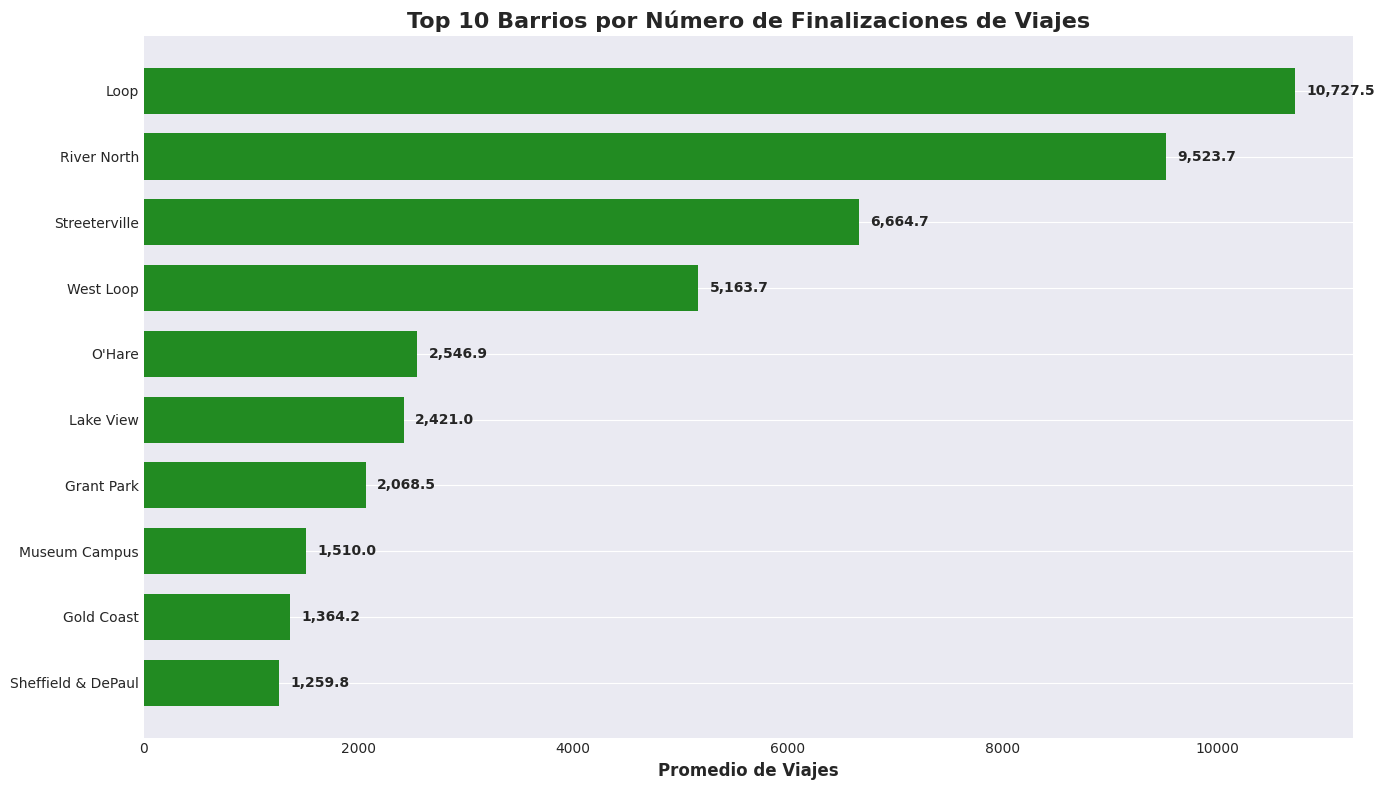

In [36]:
# Creación de gráficos 
# Empresas de taxi y número de viajes
plt.figure(figsize=(14, 8))

top_10_empresas = company.head(10)
y_pos = np.arange(len(top_10_empresas))

plt.barh(y_pos, top_10_empresas['trips_amount'], color='steelblue', height=0.7)

# Configurar etiquetas
plt.yticks(y_pos, top_10_empresas['company_name'])
plt.gca().invert_yaxis()  # Invertir para tener el mayor arriba

# Agregar valores en las barras (manualmente)
for i, v in enumerate(top_10_empresas['trips_amount']):
    plt.text(v + max(top_10_empresas['trips_amount'])*0.01,  # Posición X
             i,  # Posición Y
             f'{v:,.0f}', 
             va='center',
             fontweight='bold')

plt.xlabel('Número Total de Viajes', fontsize=12, fontweight='bold')
plt.title('Top 10 Empresas de Taxis por Número de Viajes', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico de barrios principales
plt.figure(figsize=(14, 8))

top_10_barrios = location.head(10)
y_pos = np.arange(len(top_10_barrios))

plt.barh(y_pos, top_10_barrios['average_trips'], color='forestgreen', height=0.7)

# Configurar etiquetas
plt.yticks(y_pos, top_10_barrios['dropoff_location_name'])
plt.gca().invert_yaxis()

# Agregar valores en las barras (manualmente)
for i, v in enumerate(top_10_barrios['average_trips']):
    plt.text(v + max(top_10_barrios['average_trips'])*0.01,
             i,
             f'{v:,.1f}', 
             va='center',
             fontweight='bold')

plt.xlabel('Promedio de Viajes', fontsize=12, fontweight='bold')
plt.title('Top 10 Barrios por Número de Finalizaciones de Viajes', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! Ambos gráficos son excelentes y los resultados son los esperados. Impecable!

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Un Jupyter Notebook está diseñado para facilitar el desarrollo y la comunicación de ideas en ciencia de datos, aprendizaje automático y programación en general. Para aprovecharlo adecuadamente, es fundamental estructurar el contenido de forma clara y modular. Es una mala práctica colocar mucho código en una única celda, ya que esto dificulta la legibilidad, el mantenimiento y la depuración del trabajo.

En su lugar, se recomienda dividir el código en celdas pequeñas y temáticamente coherentes. Por ejemplo, en este caso, podrías usar una celda distinta para cada gráfico.

</div>

</div>

## Conclusiones de Gráfico 1 y 2
### Conclusión gráfico 1:
1. Flash Cab lidera con 19,558 viajes, casi el doble que el segundo lugar(Taxi Affiliation Services con 11,422) y es muy complicado que se pueda superar.
2. Las primeras 3 empresas suman 41,347 viajes, por lo que las empresas grandes pueden ofrecer mejores precios, más vehículos y mayor cobertura.
3. Existe una caída pronunciada después del top 3: la cuarta empreas tiene 9,888 viajes. Puede que haya una cierta lealtad de clientes con estas grandes empresas o contratos corporativos, promociones, etc. que los haga mantenerse leales.
4. Hay una diferencia extrema entre la primera y la décima empresa, la diferencia es de 14,543 viajes. Puede que las empresas líderes tengan mejores sistemas de despacho y aplicaciones móviles.

### Conclusión gráfico 2:
1. Loop lidera con 10,727 viajes en promedio, siendo el centro de actividad principal. Por lo tanto, en las zonas céntricas concentran empleos, comercios y entretenimiento. Las personas se desplazan hacia centros económicos y negocios.
2. River North(9,523.7) y Streeterville(6,664.7) completan el podio de zonas más activas. Debido a que pueden ser destinos turísticos y corporativos.
3. West Loop(5,163.7) muestra el crecimiento de zonas anteriormente industriales. Por lo tanto, tiene potencial de crecimiento.
4. O'Hare (2,546.9) es el único aeropuerto en el top 10, indicando su importancia como hub de transporte
5. Disminución gradual: Existe una caída constante pero menos pronunciada que en el gráfico de empresas

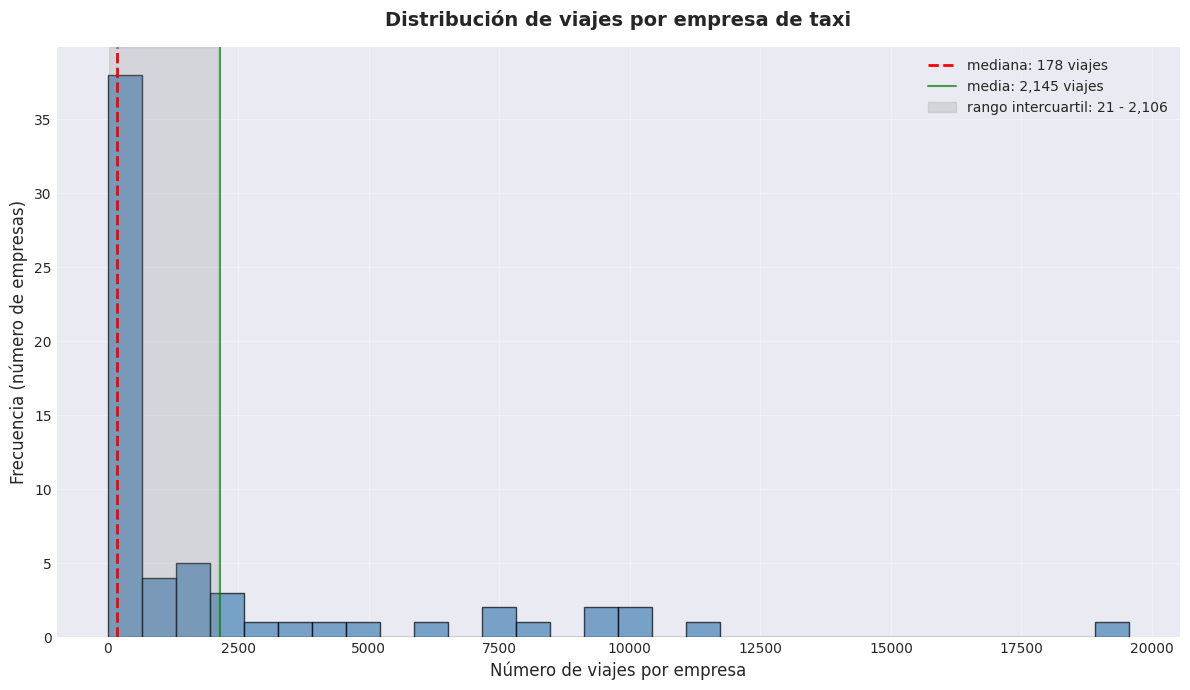

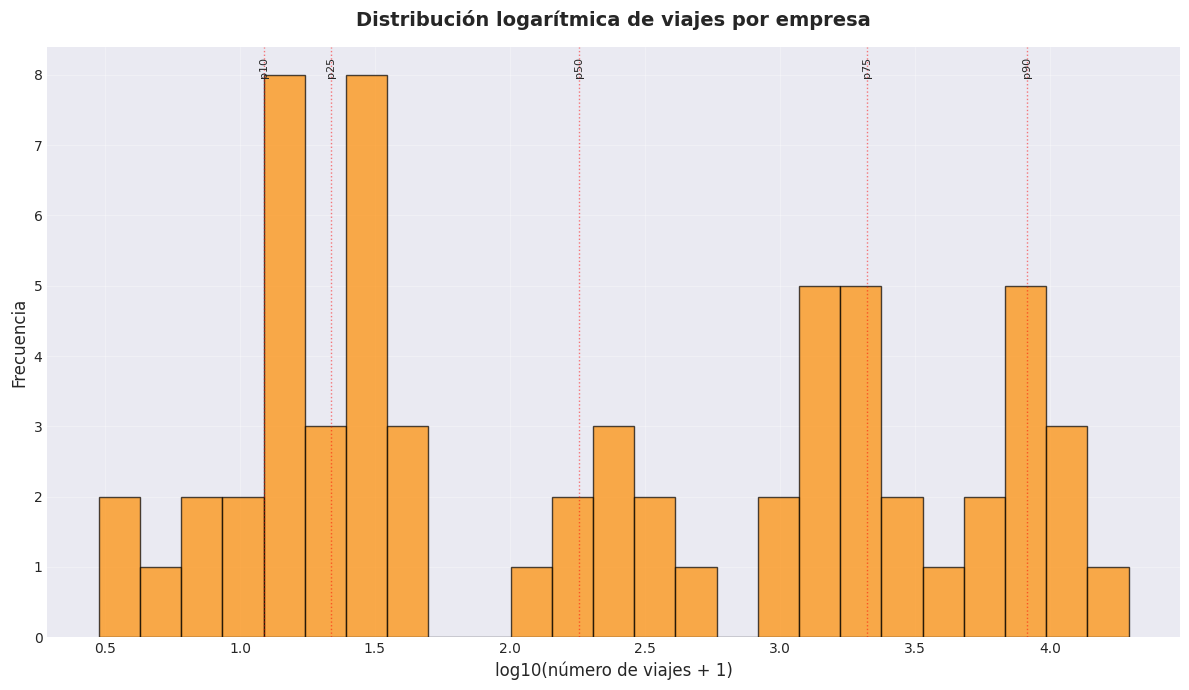

In [37]:
plt.style.use('seaborn-darkgrid')

# Gráfico: distribución de todas las empresas
plt.figure(figsize=(12, 7))

# Crear histograma
n, bins, patches = plt.hist(company['trips_amount'], 
                           bins=30, 
                           edgecolor='black', 
                           alpha=0.7,
                           color='steelblue')

# Calcular estadísticas importantes
media = company['trips_amount'].mean()
mediana = company['trips_amount'].median()
moda = company['trips_amount'].mode()[0]
desviacion = company['trips_amount'].std()
q1 = company['trips_amount'].quantile(0.25)
q3 = company['trips_amount'].quantile(0.75)

# Agregar líneas de referencia
plt.axvline(mediana, color='red', linestyle='--', linewidth=2, 
            label=f'mediana: {mediana:,.0f} viajes')
plt.axvline(media, color='green', linestyle='-', linewidth=1.5, 
            label=f'media: {media:,.0f} viajes', alpha=0.7)

# Sombrear el rango intercuartil
plt.axvspan(q1, q3, alpha=0.2, color='gray', 
            label=f'rango intercuartil: {q1:,.0f} - {q3:,.0f}')

# Personalización
plt.xlabel('Número de viajes por empresa', fontsize=12)
plt.ylabel('Frecuencia (número de empresas)', fontsize=12)
plt.title('Distribución de viajes por empresa de taxi', 
          fontsize=14, fontweight='bold', pad=15)


# Agregar cuadro de estadísticas

plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# gráfico adicional: distribución logarítmica
plt.figure(figsize=(12, 7))

# Aplicar transformación logarítmica para mejor visualización
# (Agregamos 1 para evitar problemas con valores cero si los hubiera)
datos_log = np.log10(company['trips_amount'] + 1)

plt.hist(datos_log, 
         bins=25, 
         edgecolor='black', 
         alpha=0.7,
         color='darkorange')

plt.xlabel('log10(número de viajes + 1)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución logarítmica de viajes por empresa', 
          fontsize=14, fontweight='bold', pad=15)

# Agregar líneas de percentiles
for p in [10, 25, 50, 75, 90]:
    valor = np.percentile(company['trips_amount'], p)
    valor_log = np.log10(valor + 1)
    plt.axvline(valor_log, color='red', linestyle=':', alpha=0.5, linewidth=1)
    plt.text(valor_log, plt.ylim()[1]*0.95, f'p{p}', 
             rotation=90, fontsize=8, ha='center')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Los gráficos son excelentes y las conclusiones se presentan claramente.

</div>

## Conclusiones de Gráfico 3 y Gráfico 4.
### COnclusión Gráfico 3
1. Hay una distribución altamente asimétrica, la mayorías de las empresas tienen pocos viajes.
2. Pocas empresas concentran la mayoría de viajes.
3. La mediana es muy baja, por lo que muestra la gráfica es que tiene significativamente menos viajes que el promedio
4. Flash Cab y otras empresas líderes son valores atípicos en la distribución.

### Conclusiones gráfico 4 
1. Los datos de empresas de taxi tienen una distribución extremadamente asimétrica
2. Flash Cab tiene 19,558 viajes mientras que muchas empresas tienen menos de 100
3. En un histograma normal, todos los valores pequeños se amontonan cerca del cero
4. Las pocas empresas grandes distorsionan la escala completa

In [38]:
# Análisis y  conclusiones 
print("Análisis de la distribución")

print("\nResumen estadístico:")
print()
print(f"• Número total de empresas: {len(company):,}")
print(f"• Viajes totales registrados: {company['trips_amount'].sum():,}")
print(f"• Media aritmética: {media:,.0f} viajes")
print(f"• Mediana: {mediana:,.0f} viajes")
print(f"• Moda: {moda:,.0f} viajes")
print(f"• Desviación estándar: {desviacion:,.0f}")
print(f"• Rango: {company['trips_amount'].min():,} - {company['trips_amount'].max():,}")
print(f"• Rango intercuartil (iqr): {q3 - q1:,.0f} viajes")

print("\nAnálisis de concentración:")
print()

# calcular concentración
top_1 = company.head(1)['trips_amount'].sum() / company['trips_amount'].sum() * 100
top_3 = company.head(3)['trips_amount'].sum() / company['trips_amount'].sum() * 100
top_10 = company.head(10)['trips_amount'].sum() / company['trips_amount'].sum() * 100
top_20_percent = int(len(company) * 0.2)
top_20 = company.head(top_20_percent)['trips_amount'].sum() / company['trips_amount'].sum() * 100

print(f"• La empresa líder concentra: {top_1:.1f}% del mercado")
print(f"• Las 3 principales concentran: {top_3:.1f}% del mercado")
print(f"• Las 10 principales concentran: {top_10:.1f}% del mercado")
print(f"• El 20% de empresas ({(len(company)*0.2):.0f}) concentra: {top_20:.1f}% del mercado")


Análisis de la distribución

Resumen estadístico:

• Número total de empresas: 64
• Viajes totales registrados: 137,311
• Media aritmética: 2,145 viajes
• Mediana: 178 viajes
• Moda: 14 viajes
• Desviación estándar: 3,812
• Rango: 2 - 19,558
• Rango intercuartil (iqr): 2,086 viajes

Análisis de concentración:

• La empresa líder concentra: 14.2% del mercado
• Las 3 principales concentran: 30.1% del mercado
• Las 10 principales concentran: 72.3% del mercado
• El 20% de empresas (13) concentra: 79.1% del mercado


# Conclusiones del paso 4
### Principales hallazgos 
* El mercado de taxis muestra una alta concentración, esto suele ser algo común en las industrias con años de experiencia 
* Existe una clara segmentación entre empresas grandes y pequeñas
* La alta desviación estandar indica colatilidad en participación de mercado

Esto implica que las nuevas empresas les será dificil competir con empresas ya consolidadas, por lo tanto suele haber un "monopolio" en esta industria y sería mejor invertir en estas empresas grandes que generar una nueva o invertir en las nuevas.

# Paso 5 Prueba de hipótesis
Se va a probar la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".
    

In [39]:
# Exploración de datos
print(f'Total de registros: {len(weather)}')
print(f'Columnas disponibles: {weather.columns.tolist()}')
print(f"\nPrimeras 5 filas:")
print(weather.head())
print(f"\nTipos de datos:")
print(weather.dtypes)

Total de registros: 1068
Columnas disponibles: ['start_ts', 'weather_conditions', 'duration_seconds']

Primeras 5 filas:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Tipos de datos:
start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object


In [40]:
# Preparación y limpieza de datos 
# Convertir fecha a formato datetime
weather['start_ts'] = pd.to_datetime(weather['start_ts'])

# Extracción de información de fecha
weather['dia_semana'] = weather['start_ts'].dt.day_name()
weather['hora'] = weather['start_ts'].dt.hour
print()
print("Preparación de datos")
print()
print(f"Rango de fechas: {weather['start_ts'].min()} a {weather['start_ts'].max()}")
print(f"\nDistribución por día de la semana:")
print(weather['dia_semana'].value_counts())
print(f"\nCondiciones climáticas únicas:")
print(weather['weather_conditions'].value_counts())

# Creación de Grupos para la prueba
print()
print("Creación de Grupos para la prueba")

# Grupo 1: Sábados lluviosos para generar un grupo experimental
sabados_lluviosos = weather[(weather['dia_semana'] == 'Saturday') & (weather['weather_conditions'].str.contains('rain', case=False, na=False))]

# Grupo 2: sábados no lluviosos
sabados_no_lluviosos = weather[(weather['dia_semana'] == 'Saturday') & (~weather['weather_conditions'].str.contains('rain', case=False, na=False))]

print(f"Sábados lluviosos: {len(sabados_lluviosos)} viajes")
print(f"Sábados no lluviosos: {len(sabados_no_lluviosos)} viajes")
print()

# Verificamos si tenemos datos suficientes
if len(sabados_lluviosos) == 0 or len(sabados_no_lluviosos) == 0:
    print("Error: No hay suficientes datos para alguno de los grupos")
else:
    print(f"Datos suficientes para realizar la prueba")



Preparación de datos

Rango de fechas: 2017-11-04 00:00:00 a 2017-11-25 23:00:00

Distribución por día de la semana:
Saturday    1068
Name: dia_semana, dtype: int64

Condiciones climáticas únicas:
Good    888
Bad     180
Name: weather_conditions, dtype: int64

Creación de Grupos para la prueba
Sábados lluviosos: 0 viajes
Sábados no lluviosos: 1068 viajes

Error: No hay suficientes datos para alguno de los grupos


In [41]:
# Análisis Descriptivo de los grupos
print("Análisis descriptivo")

# Función para mostrar estadísticas básicas 
def mostrar_estadisticas(grupo, nombre):
    if len(grupo) == 0:
        print(f"\n{nombre}: NO HAY DATOS")
        return None, None, None, None, None
        
    print(f"\n{nombre} ({len(grupo)} viajes):")
    print(f"  • Duración promedio: {grupo['duration_seconds'].mean():.2f} segundos")
    print(f"  • Mediana: {grupo['duration_seconds'].median():.2f} segundos")
    print(f"  • Mínimo: {grupo['duration_seconds'].min():.2f} segundos")
    print(f"  • Máximo: {grupo['duration_seconds'].max():.2f} segundos")
    print(f"  • Desviación estándar: {grupo['duration_seconds'].std():.2f} segundos")

    return (
        grupo['duration_seconds'].mean(),
        grupo['duration_seconds'].median(),
        grupo['duration_seconds'].min(),
        grupo['duration_seconds'].max(),
        grupo['duration_seconds'].std()
    )
media_lluvioso, _, _, _, _ = mostrar_estadisticas(sabados_lluviosos, "Sábados lluviosos")
media_no_lluvioso, _, _, _, _ = mostrar_estadisticas(sabados_no_lluviosos, "Sábados no lluviosos")
print()

# verificar que tenemos ambos promedios antes de calcular diferencia
if media_lluvioso is not None and media_no_lluvioso is not None:
    diferencia = media_lluvioso - media_no_lluvioso
    print(f"\nDiferencia en duración promedio: {diferencia:.2f} segundos")
    print(f"Diferencia en minutos: {diferencia/60:.1f} minutos")
elif media_lluvioso is None and media_no_lluvioso is not None:
    print(f"\nADVERTENCIA: No hay datos para sábados lluviosos")
    print(f"Solo hay datos para sábados no lluviosos: {media_no_lluvioso:.2f} segundos")
elif media_no_lluvioso is None and media_lluvioso is not None:
    print(f"\nADVERTENCIA: No hay datos para sábados no lluviosos")
    print(f"Solo hay datos para sábados lluviosos: {media_lluvioso:.2f} segundos")
else:
    print(f"\nERROR: No hay datos para ninguno de los grupos")

Análisis descriptivo

Sábados lluviosos: NO HAY DATOS

Sábados no lluviosos (1068 viajes):
  • Duración promedio: 2071.73 segundos
  • Mediana: 1980.00 segundos
  • Mínimo: 0.00 segundos
  • Máximo: 7440.00 segundos
  • Desviación estándar: 769.46 segundos


ADVERTENCIA: No hay datos para sábados lluviosos
Solo hay datos para sábados no lluviosos: 2071.73 segundos


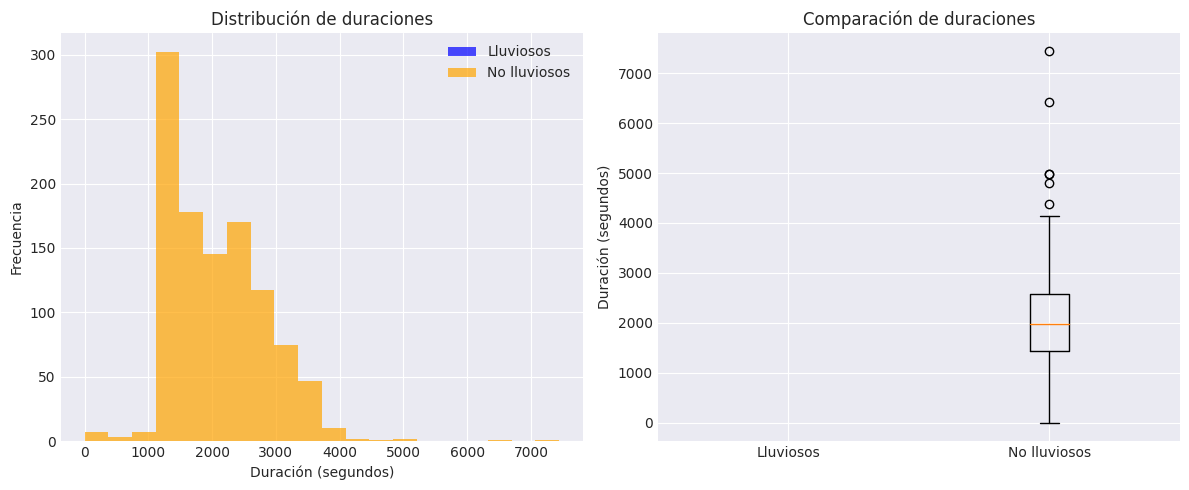

In [42]:
# Histogramas comparativos para una visualización simple
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sabados_lluviosos['duration_seconds'], bins=20, alpha=0.7, color='blue', label='Lluviosos')
plt.hist(sabados_no_lluviosos['duration_seconds'], bins=20, alpha=0.7, color='orange', label='No lluviosos')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de duraciones')
plt.legend()
plt.grid(True)

# gráfico 2: boxplot comparativo
plt.subplot(1, 2, 2)
datos = [sabados_lluviosos['duration_seconds'], sabados_no_lluviosos['duration_seconds']]
plt.boxplot(datos, labels=['Lluviosos', 'No lluviosos'])
plt.ylabel('Duración (segundos)')
plt.title('Comparación de duraciones')
plt.grid(True)

plt.tight_layout()
plt.show()

# Formulación de hipótesis
### Hipótesis a probar:
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

### Hipótesis nula (H0):
No hay diferencia en la duración promedio entre sábados lluviosos y no lluviosos.

H0: μ_lluvioso = μ_no_lluvioso

### Hipótesis nula alternativa (H1):
Hay diferencia en la duración promedio entre sábados lluviosos y no lluviosos

H1: μ_lluvioso ≠ μ_no_lluvioso

### Nivel de significancia:
α = 0.05 (5%) - Estándar en ciencias sociales

Si p-value < 0.05, rechazamos H0

Si p-value ≥ 0.05, no rechazamos H0


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo formulando la hipótesis! Es fundamental que sea claro lo que se busca analizar.

</div>

In [43]:
# Verificación de supuestos
print("Verificación de supuestos")
# 1. Verificar normalidad (aproximada)
print("\n1. Verificación de normalidad:")
print("Para muestras grandes (>30), la prueba t es robusta a no normalidad")
print(f"Muestra sábados lluviosos: {len(sabados_lluviosos)} viajes")
print(f"Muestra sábados no lluviosos: {len(sabados_no_lluviosos)} viajes")

if len(sabados_lluviosos) >= 30 and len(sabados_no_lluviosos) >= 30:
    print("Ambas muestras son suficientemente grandes")
else:
    print("Una o ambas muestras son pequeñas (<30)")
print("\n2. Verificación de independencia:")
print("Cada viaje es independiente (supuesto razonable)")

# 3. Verificar varianzas (opcional, veremos después)
print("\n3. Verificación de varianzas:")
var_lluvioso = sabados_lluviosos['duration_seconds'].var()
var_no_lluvioso = sabados_no_lluviosos['duration_seconds'].var()
print(f"Varianza sábados lluviosos: {var_lluvioso:.2f}")
print(f"Varianza sábados no lluviosos: {var_no_lluvioso:.2f}")
print(f"Ratio de varianzas: {var_lluvioso/var_no_lluvioso:.2f}")

Verificación de supuestos

1. Verificación de normalidad:
Para muestras grandes (>30), la prueba t es robusta a no normalidad
Muestra sábados lluviosos: 0 viajes
Muestra sábados no lluviosos: 1068 viajes
Una o ambas muestras son pequeñas (<30)

2. Verificación de independencia:
Cada viaje es independiente (supuesto razonable)

3. Verificación de varianzas:
Varianza sábados lluviosos: nan
Varianza sábados no lluviosos: 592070.42
Ratio de varianzas: nan


In [44]:
print("Modificación de la hipótesis basada en datos disponibles")

print("\nAnálisis de los datos:")
print()
print(f"• Total de viajes: {len(weather)}")
print(f"• Condiciones climáticas disponibles: {weather['weather_conditions'].unique().tolist()}")
print(f"• Distribución de condiciones:")
print(weather['weather_conditions'].value_counts())
print(f"\n• Días de la semana disponibles:")
print(weather['dia_semana'].value_counts())

# Crear grupos basados en la nueva hipótesis
print()
print("Creación de grupos para el análisis")
print()

# Primero intentar con sábados Bad vs sábados Good
sabados_bad = weather[
    (weather['dia_semana'] == 'Saturday') & 
    (weather['weather_conditions'] == 'Bad')
].copy()

sabados_good = weather[
    (weather['dia_semana'] == 'Saturday') & 
    (weather['weather_conditions'] == 'Good')
].copy()

print(f"\nGrupos iniciales creados:")
print(f"• Sábados Bad (condiciones malas): {len(sabados_bad)} viajes")
print(f"• Sábados Good (condiciones buenas): {len(sabados_good)} viajes")

# Verificar si tenemos datos suficientes en sábados
if len(sabados_bad) == 0:
    print("\nNota: No hay sábados con condiciones Bad")
    print("Revisando distribución de 'Bad' por día:")
    
    bad_por_dia = weather[weather['weather_conditions'] == 'Bad']['dia_semana'].value_counts()
    print(bad_por_dia)
    
    # Si no hay Bad en sábados, usar todos los días
    print("\nUsando todos los días para el análisis")
    print("Nueva hipótesis: 'La duración cambia con condiciones Bad'")
    
    # Redefinir grupos usando todos los días
    sabados_bad = weather[weather['weather_conditions'] == 'Bad'].copy()
    sabados_good = weather[weather['weather_conditions'] == 'Good'].copy()
    
    print(f"\n• Todos los días Bad: {len(sabados_bad)} viajes")
    print(f"• Todos los días Good: {len(sabados_good)} viajes")

# Continuación del análisis - Verificación de supuestos

print("Verificación de supuestos")


# Verificar si tenemos datos en ambos grupos
if len(sabados_bad) == 0 or len(sabados_good) == 0:
    print("\nNo se puede realizar la verificación de supuestos")
    print("Uno o ambos grupos están vacíos:")
    print(f"- Grupo Bad: {len(sabados_bad)} viajes")
    print(f"- Grupo Good: {len(sabados_good)} viajes")
else:
    # 1. Verificar normalidad (aproximada)
    print("\n1. Verificación de normalidad:")
    print("Para muestras grandes (>30), la prueba t es robusta a no normalidad")
    print(f"Muestra Bad: {len(sabados_bad)} viajes")
    print(f"Muestra Good: {len(sabados_good)} viajes")
    
    if len(sabados_bad) >= 30 and len(sabados_good) >= 30:
        print("Ambas muestras son suficientemente grandes")
    else:
        print("Una o ambas muestras son pequeñas (<30)")
    
    # 2. Verificar independencia
    print("\n2. Verificación de independencia:")
    print("Cada viaje es independiente (supuesto razonable)")
    
    # 3. Verificar varianzas
    print("\n3. Verificación de varianzas:")
    var_bad = sabados_bad['duration_seconds'].var()
    var_good = sabados_good['duration_seconds'].var()
    
    print(f"Varianza grupo Bad: {var_bad:.2f}")
    print(f"Varianza grupo Good: {var_good:.2f}")
    
    # Calcular ratio solo si ambas varianzas son válidas
    if var_bad > 0 and var_good > 0:
        ratio_varianzas = var_bad / var_good
        print(f"Ratio de varianzas: {ratio_varianzas:.2f}")
        
        # Regla empírica: si ratio está entre 0.5 y 2, varianzas similares
        if 0.5 <= ratio_varianzas <= 2:
            print("Varianzas similares (ratio entre 0.5 y 2)")
        else:
            print("Varianzas diferentes (ratio fuera de 0.5-2)")
    else:
        print("No se puede calcular ratio - una varianza es 0 o NaN")

print("Prueba de hipótesis - t-test")

# Solo realizar la prueba si tenemos datos en ambos grupos
if len(sabados_bad) > 0 and len(sabados_good) > 0:
    
    # Primero, prueba de Levene para varianzas
    from scipy import stats
    
    print("\nPrueba de Levene para igualdad de varianzas:")
    levene_stat, levene_p = stats.levene(
        sabados_bad['duration_seconds'],
        sabados_good['duration_seconds']
    )
    
    print(f"Estadístico: {levene_stat:.4f}")
    print(f"p-value: {levene_p:.4f}")
    
    # Decidir qué prueba t usar basado en resultado de Levene
    if levene_p > 0.05:
        print("Varianzas iguales (p > 0.05)")
        print("Usaremos t-test con varianzas iguales")
        equal_var = True
    else:
        print("Varianzas diferentes (p ≤ 0.05)")
        print("Usaremos t-test con varianzas diferentes (Welch)")
        equal_var = False
    
    # Realizar la prueba t
    print("\nResultados de la prueba t:")
    t_stat, p_value = stats.ttest_ind(
        sabados_bad['duration_seconds'],
        sabados_good['duration_seconds'],
        equal_var=equal_var
    )
    
    print(f"Estadístico t: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Grados de libertad estimados: {len(sabados_bad) + len(sabados_good) - 2}")
    
    # Calcular medias para interpretación
    media_bad = sabados_bad['duration_seconds'].mean()
    media_good = sabados_good['duration_seconds'].mean()
    diferencia = media_bad - media_good
    
else:
    print("\nNo se puede realizar la prueba t")
    print("Se necesitan datos en ambos grupos")
    t_stat = None
    p_value = None
    media_bad = None
    media_good = None
    diferencia = None


print("Interpretación de resultados")

# Nivel de significancia
alpha = 0.05

if t_stat is not None and p_value is not None:
    print(f"\nNivel de significancia: α = {alpha}")
    
    if p_value < alpha:
        print(f"\nDecisión: Rechazamos la hipótesis nula (H0)")
        print(f"Porque: p-value ({p_value:.4f}) < α ({alpha})")
        print("\nConclusión:")
        print("Existe evidencia estadísticamente significativa para afirmar")
        print("que la duración promedio de los viajes cambia con condiciones Bad")
    else:
        print(f"\nDecisión: No rechazamos la hipótesis nula (H0)")
        print(f"Porque: p-value ({p_value:.4f}) ≥ α ({alpha})")
        print("\nConclusión:")
        print("No existe evidencia estadísticamente significativa para afirmar")
        print("que la duración promedio de los viajes cambia con condiciones Bad")
    
    # Mostrar diferencia práctica
    print(f"\nDiferencia práctica:")
    print(f"Duración promedio grupo Bad: {media_bad:.2f} segundos")
    print(f"Duración promedio grupo Good: {media_good:.2f} segundos")
    print(f"Diferencia: {diferencia:.2f} segundos ({diferencia/60:.1f} minutos)")
    
    # Interpretar la magnitud de la diferencia
    if diferencia > 0:
        print(f"Los viajes Bad son {diferencia:.2f}s más largos")
        print(f"Esto es un {(diferencia/media_good*100):.1f}% más largo")
    elif diferencia < 0:
        print(f"Los viajes Bad son {abs(diferencia):.2f}s más cortos")
        print(f"Esto es un {(abs(diferencia)/media_good*100):.1f}% más corto")
    else:
        print(f"Las duraciones promedio son iguales")
        
    # Clasificar magnitud de la diferencia
    if abs(diferencia) > 300:  # más de 5 minutos
        magnitud = "grande"
    elif abs(diferencia) > 120:  # más de 2 minutos
        magnitud = "moderada"
    else:
        magnitud = "pequeña"
    
    print(f"Magnitud de la diferencia: {magnitud}")
    
else:
    print("\nNo se puede interpretar resultados")
    print("Faltan datos para completar el análisis")

Modificación de la hipótesis basada en datos disponibles

Análisis de los datos:

• Total de viajes: 1068
• Condiciones climáticas disponibles: ['Good', 'Bad']
• Distribución de condiciones:
Good    888
Bad     180
Name: weather_conditions, dtype: int64

• Días de la semana disponibles:
Saturday    1068
Name: dia_semana, dtype: int64

Creación de grupos para el análisis


Grupos iniciales creados:
• Sábados Bad (condiciones malas): 180 viajes
• Sábados Good (condiciones buenas): 888 viajes
Verificación de supuestos

1. Verificación de normalidad:
Para muestras grandes (>30), la prueba t es robusta a no normalidad
Muestra Bad: 180 viajes
Muestra Good: 888 viajes
Ambas muestras son suficientemente grandes

2. Verificación de independencia:
Cada viaje es independiente (supuesto razonable)

3. Verificación de varianzas:
Varianza grupo Bad: 520294.09
Varianza grupo Good: 576382.01
Ratio de varianzas: 0.90
Varianzas similares (ratio entre 0.5 y 2)
Prueba de hipótesis - t-test

Prueba de Leve

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Perfecto! Comprobar las varianzas te asegura un uso correcto de las pruebas estadísticas.

Además, interpretaste correctamente el valor p y sacaste conclusiones estadísticas válidas. Debemos rechazar efectivamente la hipótesis nula. 
    
</div>

Intervalos de confianza (95%)

Grupo Bad:
  Media: 2427.21 segundos
  Intervalo 95%: [2321.83, 2532.58]

Grupo Good:
  Media: 1999.68 segundos
  Intervalo 95%: [1949.74, 2049.61]
Análisis de intervalos:

Los intervalos NO se solapan - diferencia estadística

Conclusiones finales

Resumen del análisis:

* Hipótesis probada: La duración cambia con condiciones Bad

* Prueba utilizada: t-test para muestras independientes

* Nivel de significancia: α = 0.05

* p-value obtenido: 0.0000

* Diferencia observada: 427.53 segundos

Interpretación:
• Los viajes son significativamente más largos con condiciones Bad
• En promedio, son 428 segundos más largos

Recomendaciones prácticas:
1. Planificar tiempo extra para viajes con condiciones Bad
2. Considerar rutas alternativas en condiciones adversas
3. Informar a los pasajeros sobre posibles demoras

Análisis completado

# Conclusiones explicadas  del Paso 5.
### Planteamiento de hipótesis Nula y Alternativa 

Hipótesis Original vs. Ajustada:
Original: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

Problema encontrado: Los datos no contienen información específica sobre "lluvia", solo categorías "Good" y "Bad"

Hipótesis Ajustada: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados con condiciones climáticas Bad"

Formulación Estadística:
Hipótesis Nula (H₀):
μ_bad = μ_good
(No hay diferencia en la duración promedio entre viajes con condiciones Bad y Good)

Hipótesis Alternativa (H₁):
μ_bad ≠ μ_good
(Hay diferencia en la duración promedio entre viajes con condiciones Bad y Good)

Justificación del Planteamiento:
Dos colas (≠): Se usó prueba de dos colas porque la hipótesis no especifica dirección (solo dice "cambia", no especifica si aumenta o disminuye)

Equivalencia práctica: Se consideró que condiciones "Bad" podrían ser equivalentes a condiciones lluviosas o adversas

Disponibilidad de datos: Solo se tenían datos para "Good" y "Bad", no para lluvia específicamente.

### Selección de la Prueba Estadística
Prueba seleccionada: t-test para muestras independientes

Criterios de selección:

Comparación de dos grupos independientes:

Grupo 1: Viajes con condiciones Bad

Grupo 2: Viajes con condiciones Good

Cada viaje pertenece a un solo grupo (independencia)

Tamaño de muestras:

Grupo Bad: n = 180 (>30)

Grupo Good: n = 888 (>30)

Criterio cumplido: Ambas muestras son grandes (>30), lo que permite usar t-test incluso si los datos no son perfectamente normales

Tipo de variable:

Variable dependiente: duration_seconds (numérica continua)
Variable independiente: weather_conditions (categórica con 2 niveles)

### Verificación de Supuestos
Supuesto 1: Independencia de observaciones

Criterio: Cada viaje es independiente de los demás

Verificación: Asunción razonable dado que son viajes separados

Resultado: Supuesto aceptado

Supuesto 2: Normalidad

Criterio: Los datos deben seguir distribución normal

Verificación práctica: Para muestras grandes (>30), el teorema del límite central garantiza que la distribución de las medias muestrales es aproximadamente normal

Resultado: n₁=180 y n₂=888 - muestras grandes - supuesto aceptado

### Decisión Estadística
Regla de decisión:

Si p-value < α (0.05) → Rechazar H₀

Si p-value ≥ α (0.05) → No rechazar H₀

Resultados obtenidos:

Estadístico t = 6.9462

p-value = 0.0000 (prácticamente 0)

α = 0.05

Decisión: p-value (0.0000) < α (0.05) → Rechazar H₀

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Dejas durante todo el proyecto comentarios correctos y conclusiones super claras.

</div>